## Simulation exercises

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(29)

1. How likely is it that you roll doubles when rolling two dice?

In [2]:
# generate dice rolls
n_trials = 10_000
n_dice = 2

rolls = np.random.choice([x for x in range(1,7)], n_trials*n_dice)
rolls = rolls.reshape(n_dice, n_trials)

rolls #this represents the roll as two parallel arrays

array([[6, 4, 5, ..., 2, 3, 3],
       [2, 1, 2, ..., 4, 4, 6]])

In [3]:
doubles = rolls[0] == rolls[1]

In [4]:
#take the mean to get the percentage of doubles
doubles.mean()

0.1613

In [455]:
#using dataframe
rolls = np.random.choice([x for x in range(1,7)], size=(n_trials,n_dice))
rolls = pd.DataFrame(rolls, columns = ['die_1', 'die_2'])
rolls.head()

,die_1,die_2
0,5,6
1,1,1
2,4,5
3,4,3
4,4,1


In [456]:
(rolls.die_1 == rolls.die_2).mean()

0.1623

2. If you flip 8 coins, what is the probability of getting exactly 3 heads? What is the probability of getting more than 3 heads?

In [5]:
#simulate the coin flip a few thousand times
# let the heads be represented as 1
n_flip = 10_000
coins = 8

flips = np.random.choice([x for x in range(2)], n_flip*coins)
flips = flips.reshape(n_flip, coins)

flips

array([[0, 0, 0, ..., 0, 1, 1],
       [0, 0, 1, ..., 1, 1, 0],
       [1, 0, 1, ..., 1, 1, 1],
       ...,
       [0, 1, 0, ..., 1, 1, 0],
       [1, 0, 0, ..., 1, 1, 1],
       [1, 0, 0, ..., 0, 1, 0]])

In [6]:
heads_per_flip = flips.sum(axis=1)

In [7]:
#a. number of rolls with 3 heads
(heads_per_flip == 3).mean()

0.2243

In [8]:
#b. number of rolls with more than three heads
(heads_per_flip > 3).mean()

0.6313

In [463]:
# useing dataframes
flips = np.random.choice([x for x in range(2)], (n_flip,coins))
flips = pd.DataFrame(flips)
flips['n_heads'] = flips.sum(axis = 1)
flips

,0,1,2,3,4,5,6,7,n_heads
0,0,0,0,0,0,0,1,0,1
1,0,0,0,1,0,1,1,0,3
2,0,1,0,0,0,1,1,0,3
3,0,1,0,0,1,1,1,0,4
4,0,1,0,1,1,0,0,1,4
...,...,...,...,...,...,...,...,...,...
9995,1,1,0,1,0,1,0,0,4
9996,1,1,1,1,0,1,0,1,6
9997,1,0,1,1,0,1,1,0,5
9998,0,0,1,1,1,1,1,0,5


3. There are approximitely 3 web development cohorts for every 1 data science cohort at Codeup. Assuming that Codeup randomly selects an alumni to put on a billboard, what are the odds that the two billboards I drive past both have data science students on them?

In [4]:
ds_odds = 0.25
# run a simulation of 10_000 ads
n_ads = 10**6
n_drivebys = 2

#two parallel arrays
data = np.random.random((n_drivebys, n_ads))
data

array([[0.86375999, 0.28490597, 0.07325639, ..., 0.56609349, 0.08331938,
        0.21506905],
       [0.90850556, 0.37595771, 0.21461822, ..., 0.1275455 , 0.55722397,
        0.80122997]])

In [10]:
((data[0] <= ds_odds) & (data[1] <= ds_odds)).mean()

0.06271

In [11]:
# with dataframes
billboards = np.random.choice(['WD', 'DS'], p=[0.75, 0.25], size = (n_ads, n_drivebys))
billboards = pd.DataFrame(billboards)
billboards['n_DS'] = (billboards == 'DS').sum(axis = 1)
(billboards.n_DS == 2).mean()

0.062751

4. Codeup students buy, on average, 3 poptart packages with a standard deviation of 1.5 a day from the snack vending machine. If on monday the machine is restocked with 17 poptart packages, how likely is it that I will be able to buy some poptarts on Friday afternoon? (Remember, if you have mean and standard deviation, use the np.random.normal)

In [476]:
days_per_week = 5
weeks_to_simulate = 10_000
simulations = np.random.normal(3, 1.5, (weeks_to_simulate, days_per_week)).round()
simulations

array([[1., 3., 3., 0., 2.],
       [1., 3., 3., 3., 3.],
       [3., 4., 5., 1., 3.],
       ...,
       [2., 3., 0., 2., 6.],
       [3., 4., 5., 5., 0.],
       [3., 2., 3., 3., 3.]])

In [474]:
(simulations.sum(axis=1) < 17).mean()

0.671

In [472]:
# using a dataframe, note we get negative numbers, something to consider in the simulation
poptarts = np.random.normal(3, 1.5, size=(weeks_to_simulate, days_per_week)).round()
poptarts = pd.DataFrame(poptarts, columns = ['m', 't', 'w', 'r', 'f'])
poptarts.head()

,m,t,w,r,f
0,3.0,3.0,5.0,1.0,-0.0
1,3.0,5.0,2.0,3.0,3.0
2,4.0,3.0,4.0,2.0,5.0
3,2.0,4.0,3.0,1.0,4.0
4,1.0,5.0,3.0,1.0,5.0


In [477]:
(poptarts.sum(axis=1) < 17).mean()

0.6712

5. 


Compare Heights

    - Men have an average height of 178 cm and standard deviation of 8cm.
    - Women have a mean of 170, sd = 6cm.
    - Since you have means and standard deviations, you can use np.random.normal to generate observations.
    - If a man and woman are chosen at random, what is the likelihood the woman is taller than the man?



In [13]:
n_choose = 2
number_of_pairs = 10_000
mens_heights = np.random.normal(178, 8, (number_of_pairs))
womens_heights = np.random.normal(170, 6, (number_of_pairs))

In [14]:
pairs = np.stack((mens_heights, womens_heights))
(pairs[0] < pairs [1]).mean()

0.2131

In [479]:
# can also directly use the arrays
(mens_heights < womens_heights).mean()

0.2131

6. 


When installing anaconda on a student's computer, there's a 1 in 250 chance that the download is corrupted and the installation fails. What are the odds that after having 50 students download anaconda, no one has an installation issue? 100 students?

What is the probability that we observe an installation issue within the first 150 students that download anaconda?

How likely is it that 450 students all download anaconda without an issue?


In [480]:
p_fail = 1/250
n_of_students = 50
n_simulations = 10_000
installs = np.random.random((n_simulations, n_of_students))
installs

array([[0.93096349, 0.9321072 , 0.53813214, ..., 0.53056289, 0.8533679 ,
        0.5615669 ],
       [0.11639417, 0.93857451, 0.00720145, ..., 0.80276276, 0.87776213,
        0.84063407],
       [0.85889713, 0.55970597, 0.12613852, ..., 0.25551517, 0.29162857,
        0.31863632],
       ...,
       [0.3126294 , 0.29506149, 0.21282271, ..., 0.45444525, 0.91439512,
        0.28424223],
       [0.8198008 , 0.26224547, 0.38821203, ..., 0.70252686, 0.47107544,
        0.24963129],
       [0.22224966, 0.97082318, 0.77790486, ..., 0.27431341, 0.7792436 ,
        0.62115412]])

In [16]:
# probability that a class of 50 has no installation issues
fails = (installs < p_fail)
(fails.sum(axis = 1) < 1).mean()

0.8115

In [17]:
# probability that a class of 100 has no installation issues
n_of_students = 100
n_simulations = 10_000
installs = np.random.random((n_simulations, n_of_students))
installs

fails = (installs < p_fail)
(fails.sum(axis = 1) < 1).mean()

0.6708

In [18]:
# probability there is a download issue within the first 150 downloads
n_of_students = 150
n_simulations = 10_000
installs = np.random.random((n_simulations, n_of_students))
installs

success_installs = (installs > p_fail)
(success_installs.sum(axis = 1) < 150).mean()

0.4523

In [481]:
# probability 450 students will install w/o problems
n_of_students = 450
n_simulations = 10_000
installs = np.random.random((n_simulations, n_of_students))

success_installs = (installs > p_fail)
(success_installs.sum(axis = 1) < 450).mean()
1 - ((success_installs.sum(axis=1) < 450).sum()/n_simulations)

0.16769999999999996

In [482]:
#using random.choice
installs = np.random.choice([0,1], n_of_students*n_simulations, p = [1-1/250, 1/250]).reshape(n_simulations, n_of_students)
1 - (installs.sum(axis = 1) > 0 ).mean()

0.16659999999999997

7.

There's a 70% chance on any given day that there will be at least one food truck at Travis Park. However, you haven't seen a food truck there in 3 days. How unlikely is this?

How likely is it that a food truck will show up sometime this week?


In [20]:
fd_prob = 0.7
n_days = 3
n_simulations = 10_000
days_simulations = np.random.random((n_simulations, n_days))
days_simulations

array([[0.0373615 , 0.63330392, 0.45668413],
       [0.40102818, 0.6633635 , 0.54532141],
       [0.18024766, 0.0816224 , 0.7394392 ],
       ...,
       [0.21819898, 0.83938931, 0.5230631 ],
       [0.98683008, 0.01183447, 0.07856825],
       [0.28755143, 0.03674341, 0.60763921]])

In [21]:
# how many simulations never had a number < 0.7
taco_truck_days = (days_simulations > fd_prob)
(taco_truck_days.sum(axis = 1) == 0).mean()

0.3469

In [22]:
# probability a truck shows up this week

n_days = 7
n_simulations = 10_000
days_simulations = np.random.random((n_simulations, n_days))
days_simulations

taco_truck_days = (days_simulations < fd_prob)
(taco_truck_days.sum(axis = 1) > 1).mean()

0.9969

In [485]:
# trucks = np.random.choice([0,1], size = (n_simulations, n_days), p = [1-fd_prob, fd_prob])
# (trucks.sum(axis=1) == 1).mean()

0.0026

8. 


If 23 people are in the same room, what are the odds that two of them share a birthday? What if it's 20 people? 40?

In [23]:
n_in_room = 23
n_simulations = 10_000

#assign a birthday to each person
b_days = np.random.choice([x for x in range(1,366)], n_simulations*n_in_room)
b_days = b_days.reshape(n_simulations, n_in_room)
b_days

array([[198, 139, 224, ..., 323, 128, 238],
       [227,  87, 342, ..., 275, 133, 203],
       [ 68, 234,  60, ..., 209, 288,  45],
       ...,
       [ 68, 105, 310, ..., 184, 347, 330],
       [307, 305, 129, ..., 332, 254, 133],
       [308,  45, 217, ..., 222,  81,  59]])

In [24]:
matches = []
for row in b_days:
    if len(set(row)) < 23 :
        matches.append(row)
len(matches)/10_000

0.5097

In [98]:
# if the number of people is 20
n_in_room = 20
n_simulations = 10_000

#assign a birthday to each person
b_days = np.random.choice([x for x in range(1,366)], n_simulations*n_in_room)
b_days = b_days.reshape(n_simulations, n_in_room)
b_days

matches = []
for row in b_days:
    if len(set(row)) < 20 :
        matches.append(row)
len(matches)/10_000

0.4058

In [26]:
# if the number of people is 40
n_in_room = 40
n_simulations = 10_000

#assign a birthday to each person
b_days = np.random.choice([x for x in range(1,366)], n_simulations*n_in_room)
b_days = b_days.reshape(n_simulations, n_in_room)
b_days

matches = []
for row in b_days:
    if len(set(row)) < 40 :
        matches.append(row)
len(matches)/10_000

0.8883

In [494]:
# more general/better solution with dataframes
# with dfs
n_in_room = 23
birthdays = np.random.choice(range(365), size = (n_simulations, n_in_room))
birthdays = pd.DataFrame(birthdays)
birthdays['n_unique'] = birthdays.nunique(axis =1)
birthdays

(birthdays.n_unique != n_in_room).mean()

0.5176

## bonus
Mage duel

In [27]:
# make dice
n_trials = 10_000
mage_1 = np.random.choice(list(range(1,5)), n_trials*6)
mage_1 = mage_1.reshape(n_trials, 6)
mage_2 = np.random.choice(list(range(1,7)), n_trials*4)
mage_2 = mage_2.reshape(n_trials, 4)
mage_1

array([[1, 3, 3, 4, 1, 2],
       [4, 3, 4, 1, 2, 1],
       [4, 3, 4, 2, 4, 1],
       ...,
       [2, 4, 1, 4, 1, 4],
       [4, 3, 1, 2, 2, 2],
       [3, 4, 3, 2, 3, 1]])

In [239]:
#now make an array of the sum of their rows
duel = np.stack((mage_1.sum(axis=1), mage_2.sum(axis=1)))
duel

array([[14, 15, 18, ..., 16, 14, 16],
       [11, 19, 16, ..., 15, 14, 13]])

In [29]:
# true means mage_1 wins
(duel[0] >= duel[1]).mean()

0.6344

Mage duel II

In [250]:
# write a function to do a single mage duel
# returns the winner of the mage duel: mage_1, mage_2

# it makes sense that mage_1 wins, their range of hp and dmg is [6, 6*4], and mage_2 has [4, 6*4]
# ergo mage_2's range of hp and dmg can be lower than the lowest of mage_1

def mage_duel():
    # determine hp points
    mage_1_hp = np.random.choice(list(range(1,5)), 6).sum()
    mage_2_hp = np.random.choice(list(range(1,5)), 4).sum()
    # determine dmg points
    mage_1_dmg = np.random.choice(list(range(1,5)), 6).sum()
    mage_2_dmg = np.random.choice(list(range(1,5)), 4).sum()
    while (mage_1_hp > 0 or mage_2_hp > 0):
        mage_2_hp -= mage_1_dmg
        if mage_2_hp <= 0:
            return True
        mage_1_hp -= mage_2_dmg
        if mage_1_hp <= 0:
            return False

simulations = 10_000
outcome = []
for battle in range(simulations):
    outcome.append(mage_duel())
sum(outcome)/simulations

0.9929

In [328]:
#alt version with series
duel_outcomes = pd.Series([mage_duel() for x in range(simulations)])
duel_outcomes.mean()

0.9933



chuck a luck

In [367]:
def chuck_a_luck(bet = np.random.choice(list(range(1,6)))):
    #return the payout: won - ante
    # default is a random bet
    dice = np.random.choice(list(range(1,6)), 3)
    #print(f"choice: {bet} \t dice: {dice}")
    return np.count_nonzero(dice == bet)-1

chuck_a_luck()

0

In [444]:
simulations = 10_000

In [445]:
# What are your chances of getting an outcome payout of $2? (where we earned $3 on the $1 ante)
outcomes = pd.Series([chuck_a_luck() for x in range(simulations)])
outcomes[outcomes == 2].size/outcomes.size

0.009

In [446]:
# What are your chances of getting an payout of $1?
outcomes = pd.Series([chuck_a_luck() for x in range(simulations)])
outcomes[outcomes == 1].size/outcomes.size

0.0957

In [447]:
#What are your chances of getting a payout of $0 where you ante $1 and win $1?
outcomes = pd.Series([chuck_a_luck() for x in range(simulations)])
outcomes[outcomes == 0].size/outcomes.size

0.3916

In [448]:
#What are your chances of getting a payout of -$1 where you ante up, but don't win anything?
outcomes = pd.Series([chuck_a_luck() for x in range(simulations)])
outcomes[outcomes == -1].size/outcomes.size

0.5113

In [449]:
#What is the average cost/gain per game? (think of averaging the total payout calculation across all simulations)
outcomes = pd.Series([chuck_a_luck() for x in range(simulations)])
outcomes.mean()

-0.3959

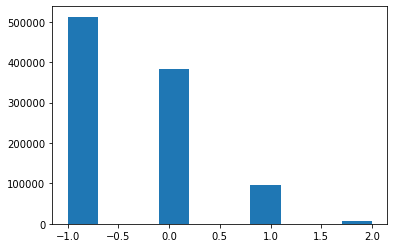

In [443]:
plt.hist(outcomes)
plt.show()

not a fair game.  likelihood of not matching represents over half the possible outcomes; and not matching means there is a loss.

In [450]:
#play a million games:
simulations = 1_000_000
outcomes = pd.Series([chuck_a_luck() for x in range(simulations)])
outcomes.mean()

-0.401806